# Modeling relaxation noise in transmon qubits 

### Remarks:
1) All system parameters are arbitrary. Only consider the system's dynamics.
2) Under relavant assumptions, system's dynamics evolve according to the Lindblad master equation. 
3) Consider two cases: zero and non-zero residual thermal photon number (in the environment). For non-zero cases, average photon number follows Bose-Einstein distribution.

### free evolution, driving_freq = 0 
Zero residual thermal photon number

### |driving_freq - qubit_freq| << relaxation_rate
1) Zero residual thermal photon number 
2) Residual thermal photon -> 1
3) Residual thermal photon -> 2
4) Residual thermal photon -> 5

In [29]:
# Import required packages
import qutip
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# System parameters
qubit_freq = 0.05 # Fixed, arbitrary transmon frequency
driving_freq = 0.05 # Arbitrary driving frequency (microwave drive)
T1 = 10
relaxation_rate = 1/T1 # Arbitrary relaxation rate

# Define discrete time steps
end_time = 10
times = np.linspace(0.0, end_time, 1000) # Arbitrary time scale

# Define operators
exciting_op = qutip.sigmam()
deexciting_op = qutip.sigmap()
raising_op = qutip.create(2)
lowering_op = qutip.destroy(2)

In [31]:
# Hamiltonian of transmon qubit 
H_transmon = 0.5*qubit_freq*qutip.sigmaz()

# Hamiltonian of transmon qubit with driving frequency, zero residual photon
H_transmon_with_drive = [[H_transmon, np.ones(len(times))], 
                         [exciting_op, np.exp(-1j*2*np.pi*driving_freq*times)],
                         [deexciting_op, np.exp(1j*2*np.pi*driving_freq*times)]]

In [32]:
num_res_photon = np.array([1, 5])

In [33]:
# Collaspe operators assuming residual thermal photon number is 0
relaxation_op = relaxation_rate*deexciting_op

In [34]:
# Collaspe operators assuming residual thermal photon number is non-zero
relaxation_op_thermal = relaxation_rate*(num_res_photon[1] + 1)*deexciting_op

In [35]:
# Initial qubit state
p_00 = 0
p_01 = 0
p_10 = 0
p_11 = 1

# Define initial density matrix 
state_0 = qutip.basis(2,0)
state_1 = qutip.basis(2,1)
init_density_matrix = p_00*state_0*state_0.dag() + p_11*state_1*state_1.dag() + p_01*state_0*state_1.dag() + p_10*state_1*state_0.dag()

In [36]:
# Expectation value operators
sigma_z = qutip.sigmaz()
population_state_0 = state_0 * state_0.dag() 
population_state_1 = state_1 * state_1.dag() 

In [37]:
# Compute expectation value or density matrix at each time step
results = qutip.mesolve(H_transmon, init_density_matrix, times, 
                        relaxation_op_thermal, 
                        [population_state_0, population_state_1], 
                        progress_bar=True, options=qutip.Options(nsteps=1e5))

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.00s. Est. time left: 00:00:00:00
30.0%. Run time:   0.00s. Est. time left: 00:00:00:00
40.0%. Run time:   0.00s. Est. time left: 00:00:00:00
50.0%. Run time:   0.00s. Est. time left: 00:00:00:00
60.0%. Run time:   0.01s. Est. time left: 00:00:00:00
70.0%. Run time:   0.01s. Est. time left: 00:00:00:00
80.0%. Run time:   0.01s. Est. time left: 00:00:00:00
90.0%. Run time:   0.01s. Est. time left: 00:00:00:00
Total run time:   0.01s


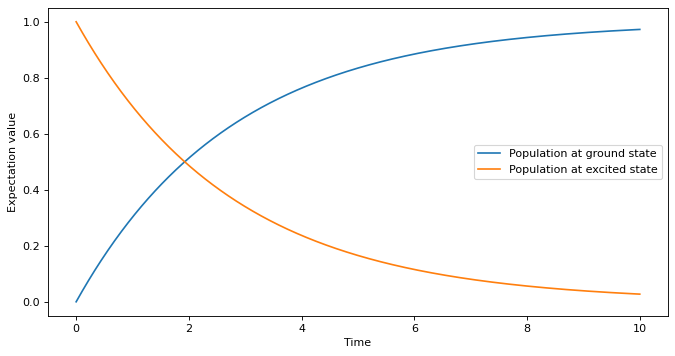

In [38]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(times, results.expect[0])
plt.plot(times, results.expect[1])
plt.ylabel("Expectation value")
plt.xlabel("Time")
plt.legend(("Population at ground state", "Population at excited state"))
plt.show()

In [39]:
results_1 = qutip.mesolve(H_transmon, init_density_matrix, times, relaxation_op_thermal, [])

In [40]:
purity = []
for states in results_1.states:
    purity.append(round(states.purity(), 3))

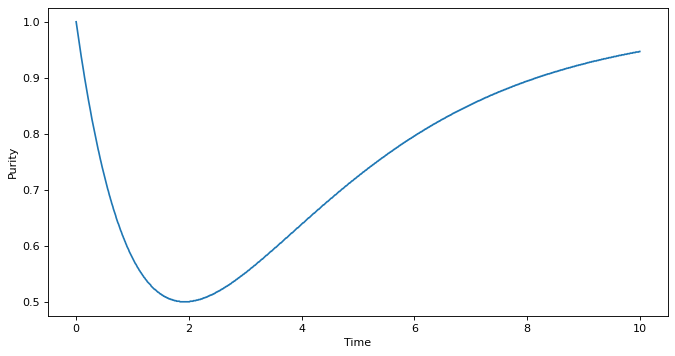

In [41]:
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(times, purity)
plt.ylabel("Purity")
plt.xlabel("Time")
plt.show()

## Reference

A. Blais et al., "Circuit quantum electrodynamics," Rev. Mod. Phys. 93, 025005, DOI: 10.1103/RevModPhys.93.025005

D. Manzano, "A short introduction to the Lindblad master equation," AIP Advances 10, 025106 (2020), DOI: 10.1063/1.5115323

S. Maniscalco, "Open quantum systems: Opportunities & challenges," Kavli Institute for Theoretical Physics, https://www.youtube.com/watch?v=BVuhHn3-PAM

T. Osborne, "Theory of quantum noise and decoherence, Lecture 7", University of Hannover, https://www.youtube.com/watch?v=LTj5UL89-ro&list=PLDfPUNusx1EotNvZr1mbu3-0QThQYilFD&index=7

J. R. Johansson, P. D. Nation, and F. Nori, "QuTiP 2: A Python framework for the dynamics of open quantum systems" Comp. Phys. Comm. 184, 1234 (2013), DOI: 10.1016/j.cpc.2012.11.019

J. R. Johansson, P. D. Nation, and F. Nori, "QuTiP: An open-source Python framework for the dynamics of open quantum systems," Comp. Phys. Comm. 183, 1760–1772 (2012), DOI: 10.1016/j.cpc.2012.02.021
